# Triple Decomposition Test

This notebook is about DESCRIBE

In [52]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.colors as colors
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter

In [2]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

In [103]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-23)_lat:(-70,70)_ds_z.nc')

### Calculate Terms

In [104]:
lfilt = 100

ct_b = ds.CT
sa_b = ds.SA

ct_m = ff.ds_filt_single(ds, lfilt, 'CT')
sa_m = ff.ds_filt_single(ds, lfilt, 'SA')

ct_e = ct_b - ct_m
sa_e = sa_b - sa_m

In [105]:
K_rho4 = 10**(-4)
K_rho5 = 10**(-5)
K_rho6 = 10**(-6)

In [106]:
ct_2 = K_rho5*ff.da_filt_single((ct_e.differentiate(coord='PRES_INTERPOLATED'))**2, lfilt)
sa_2 = K_rho5*ff.da_filt_single((sa_e.differentiate(coord='PRES_INTERPOLATED'))**2, lfilt)

ct_3 = K_rho5*(ct_m.differentiate(coord='PRES_INTERPOLATED'))**2
sa_3 = K_rho5*(sa_m.differentiate(coord='PRES_INTERPOLATED'))**2

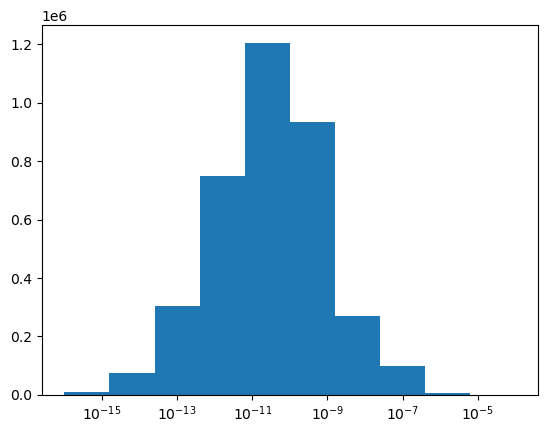

In [107]:
bins = np.logspace(-16,-4,num=11)
ct_2.plot.hist(bins=bins)
plt.xscale('log')

### Variance Sections

In [108]:
x='LATITUDE'
y='PRES_INTERPOLATED'

In [109]:
ct_start = 10**-14
ct_end   = 10**-7
ct_norm  = colors.LogNorm(vmin=ct_start, vmax=ct_end)
ct_cmap  = cmo.matter_r

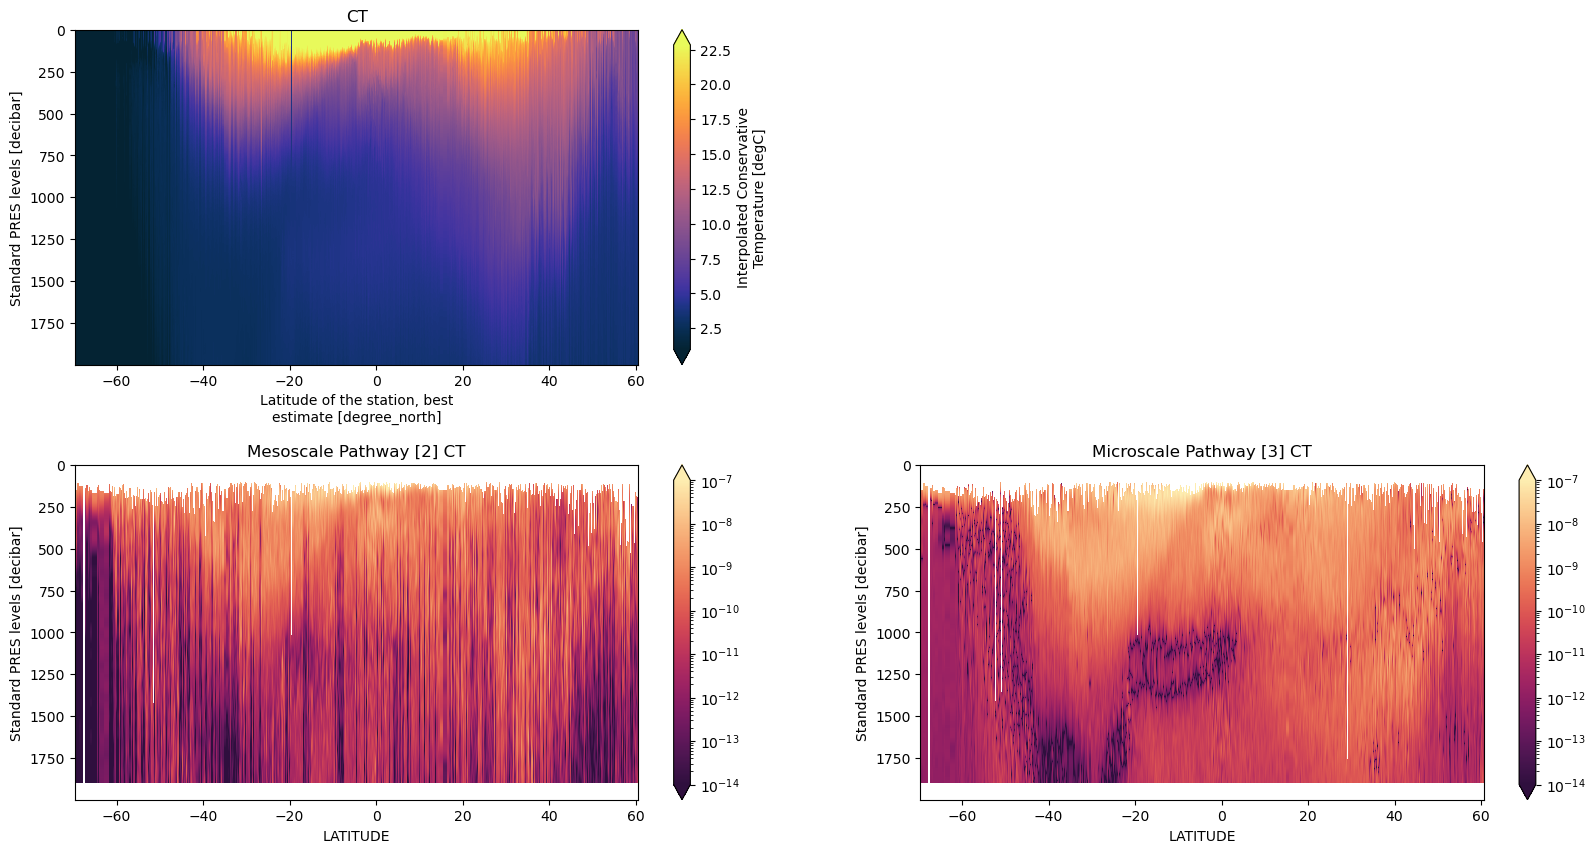

In [110]:
plt.figure(figsize=(20,10))

plt.subplot(221)
ds.CT.sortby(x).plot(x=x, y=y, cmap=cmo.thermal, robust=True)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(223)
ct_2.sortby(x).where(ct_2.mask==1).plot(x=x, y=y, norm=ct_norm, cmap=ct_cmap)
plt.gca().invert_yaxis()
plt.title('Mesoscale Pathway [2] CT')

plt.subplot(224)
ct_3.sortby(x).where(ct_3.mask==1).plot(x=x, y=y, norm=ct_norm, cmap=ct_cmap)
plt.gca().invert_yaxis()
plt.title('Microscale Pathway [3] CT')

plt.subplots_adjust(hspace=0.3)

In [111]:
sa_start = 10**-15
sa_end   = 10**-9
sa_norm  = colors.LogNorm(vmin=sa_start, vmax=sa_end)
sa_cmap  = cmo.matter_r

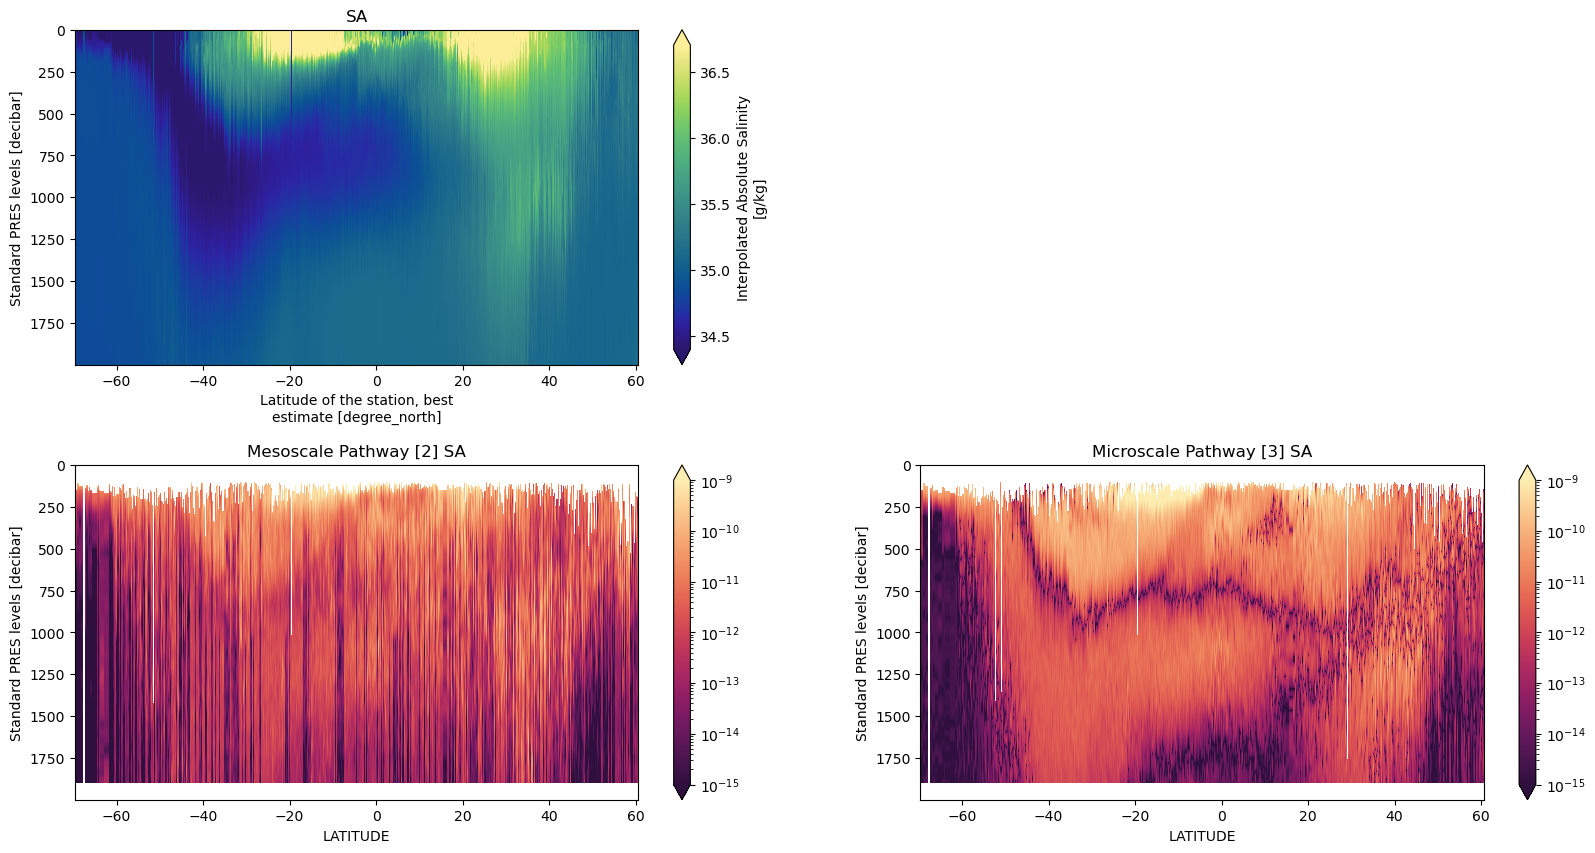

In [112]:
x='LATITUDE'
y='PRES_INTERPOLATED'

plt.figure(figsize=(20,10))

plt.subplot(221)
ds.SA.sortby(x).plot(x=x, y=y, cmap=cmo.haline, robust=True)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(223)
sa_2.sortby(x).where(sa_2.mask==1).plot(x=x, y=y, norm=sa_norm, cmap=sa_cmap)
plt.gca().invert_yaxis()
plt.title('Mesoscale Pathway [2] SA')

plt.subplot(224)
sa_3.sortby(x).where(sa_3.mask==1).plot(x=x, y=y, norm=sa_norm, cmap=sa_cmap)
plt.gca().invert_yaxis()
plt.title('Microscale Pathway [3] SA')

plt.subplots_adjust(hspace=0.3)

### Ratio Sections

In [113]:
ct_tot  = ct_2 + ct_3
ct_2rat = ct_2/ct_tot
ct_3rat = ct_3/ct_tot

sa_tot  = sa_2 + sa_3
sa_2rat = sa_2/sa_tot
sa_3rat = sa_3/sa_tot

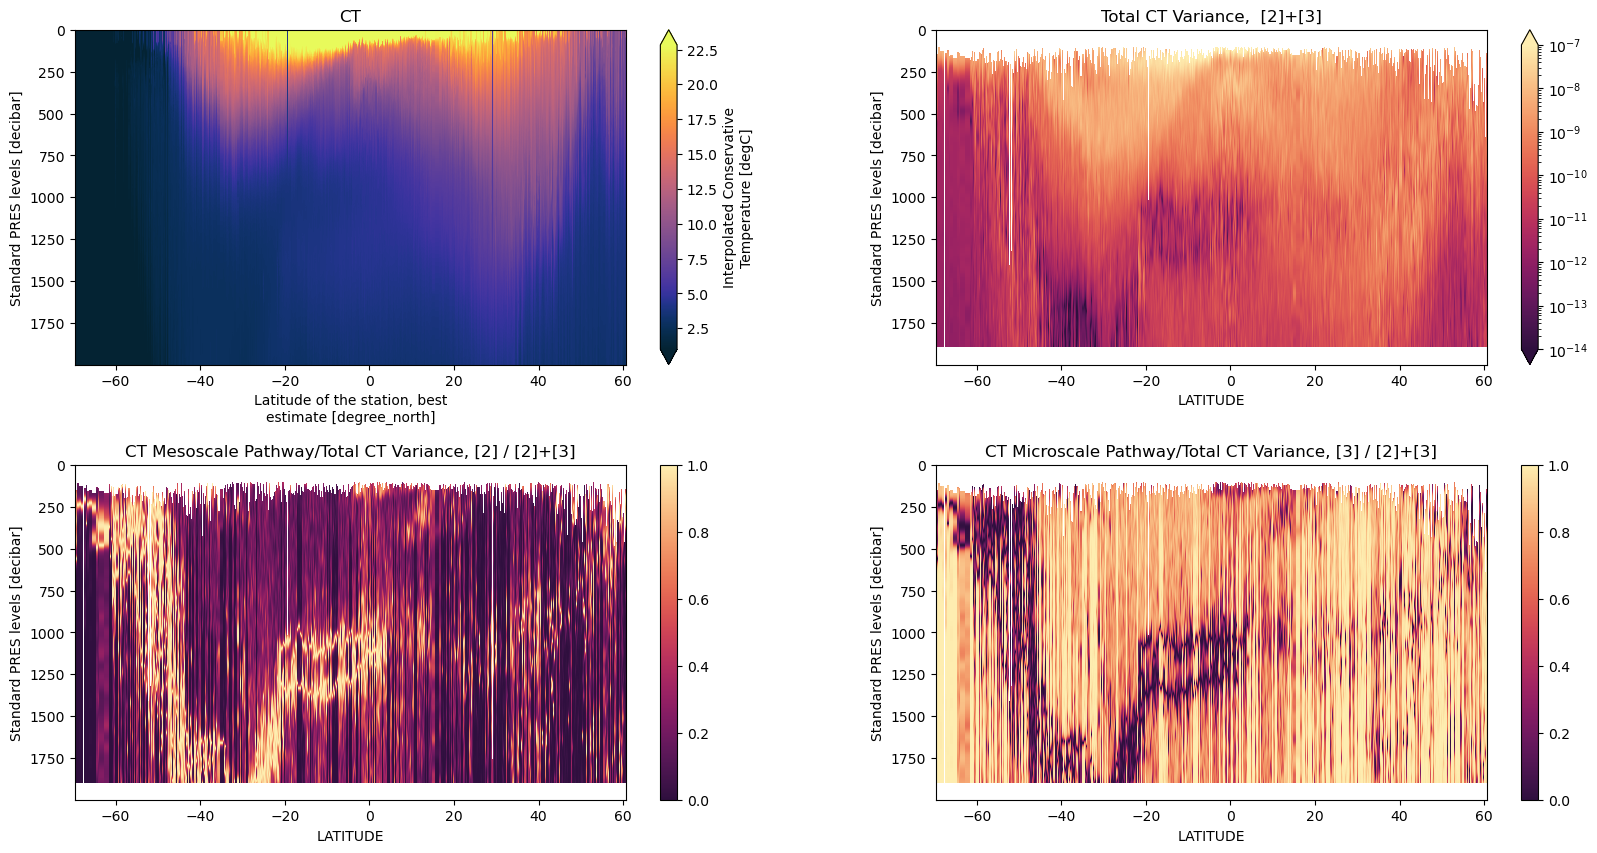

In [114]:
plt.figure(figsize=(20,10))

plt.subplot(221)
ds.CT.sortby(x).plot(x=x, y=y, cmap=cmo.thermal, robust=True)
plt.gca().invert_yaxis()
plt.title('CT')

plt.subplot(222)
ct_tot.sortby(x).where(ct_tot.mask==1).plot(x=x, y=y, norm=ct_norm, cmap=ct_cmap)
plt.gca().invert_yaxis()
plt.title('Total CT Variance,  [2]+[3]')

plt.subplot(223)
ct_2rat.sortby(x).where(ct_2rat.mask==1).plot(x=x, y=y, cmap=cmo.matter_r)
plt.gca().invert_yaxis()
plt.title('CT Mesoscale Pathway/Total CT Variance, [2] / [2]+[3]')

plt.subplot(224)
ct_3rat.sortby(x).where(ct_3rat.mask==1).plot(x=x, y=y, cmap=cmo.matter_r)
plt.gca().invert_yaxis()
plt.title('CT Microscale Pathway/Total CT Variance, [3] / [2]+[3]')

plt.subplots_adjust(hspace=0.3, wspace=0.25)

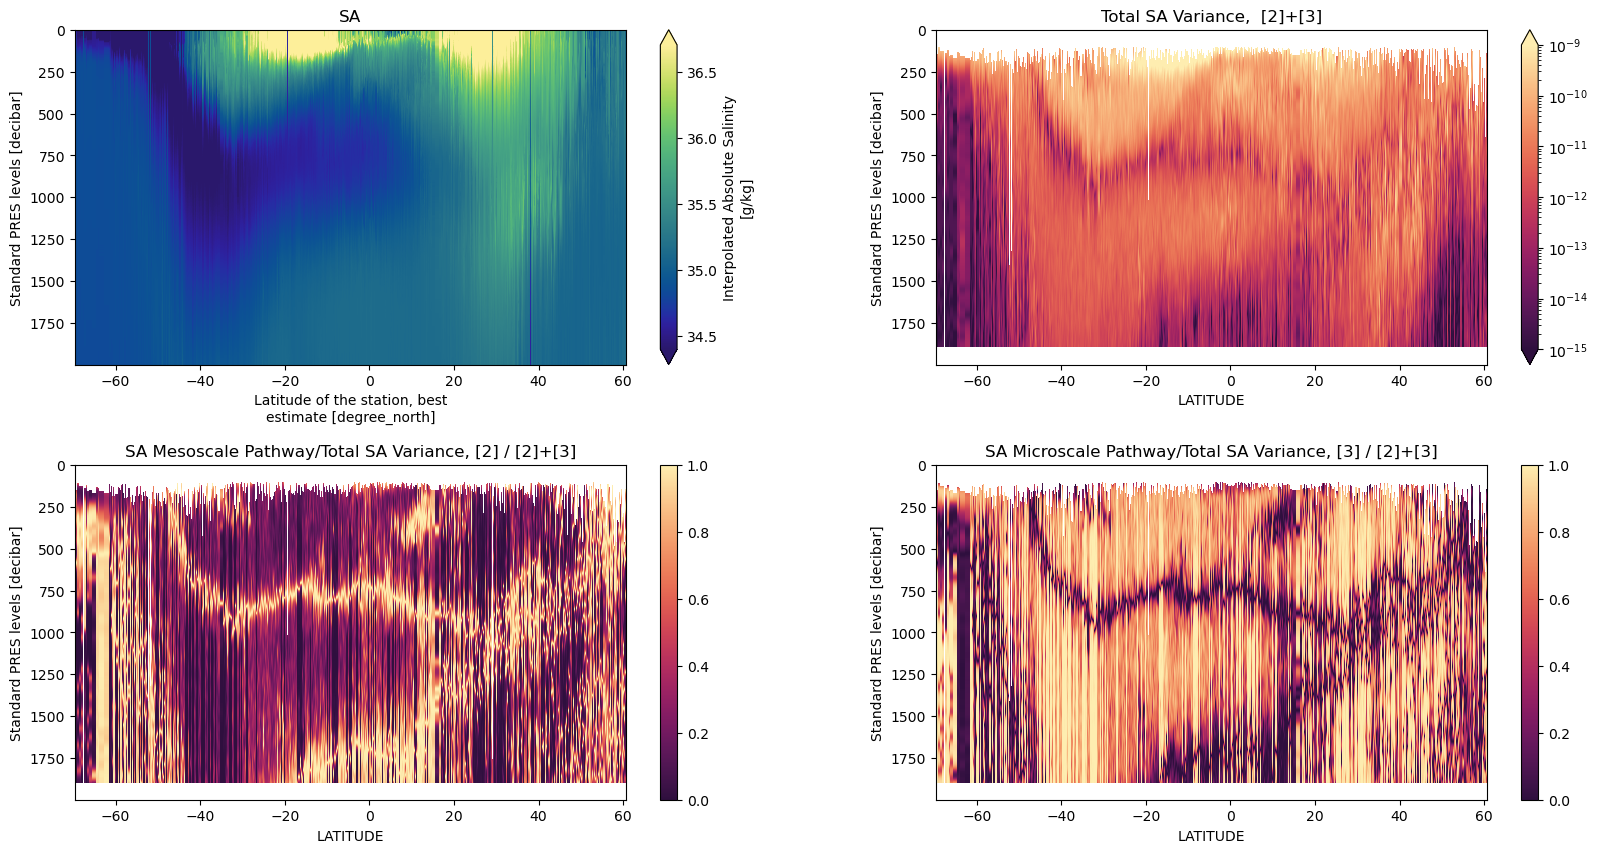

In [115]:
plt.figure(figsize=(20,10))

plt.subplot(221)
ds.SA.sortby(x).plot(x=x, y=y, cmap=cmo.haline, robust=True)
plt.gca().invert_yaxis()
plt.title('SA')

plt.subplot(222)
sa_tot.sortby(x).where(sa_tot.mask==1).plot(x=x, y=y, norm=sa_norm, cmap=sa_cmap)
plt.gca().invert_yaxis()
plt.title('Total SA Variance,  [2]+[3]')

plt.subplot(223)
sa_2rat.sortby(x).where(sa_2rat.mask==1).plot(x=x, y=y, cmap=cmo.matter_r)
plt.gca().invert_yaxis()
plt.title('SA Mesoscale Pathway/Total SA Variance, [2] / [2]+[3]')

plt.subplot(224)
sa_3rat.sortby(x).where(sa_3rat.mask==1).plot(x=x, y=y, cmap=cmo.matter_r)
plt.gca().invert_yaxis()
plt.title('SA Microscale Pathway/Total SA Variance, [3] / [2]+[3]')

plt.subplots_adjust(hspace=0.3, wspace=0.25)

TO DO NEXT:
- check units, compare order of magnitude with papers
- try horizontal averaging, maybe 2deg bins?
- make similar plots to Castro, pick profiles in the same places and over the same depth range
- make similar plots to Ferrari & Polzin
- averaging: does <C>=C_m?? look at the paper to see if they mention this; what about theta_t within angle brackets vs within angle brackets and under tilde?
- ~~for term 2: should be filtered again to keep only the large scale from the filter~~
- add isopycnals to compare water mass locations
- 1750 20S: look at colorscale or look at profiles to compare salinity to its gradient
- inflection point in temp: does using potential temperature change this?
- ~~add both together, plot the fraction for each~~; ALSO try computing x, compare does x look similar to the sum?
  - keep in mind the whole discussion from Steinberg about extra terms when computing the variance of a tracer